In [46]:
# pip install wordcloud

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import contingency
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime


In [2]:
yt = pd.read_csv("youtubers.csv")#.drop(yt.columns[0], axis = 1)


In [3]:
yt = yt.drop([yt.columns[0], yt.columns[-1]],axis = 1)

yt.head()

,youtuber,channel_id,sex,sub_count,num_views,num_vids
0,MrBeast Gaming,UCIPPMRA040LQr5QPyJEbmXA,M,36400000,6376172328,141
1,Markiplier,UC7_YxT-KID8kRbqZo7MyscQ,M,35200000,20307840565,5489
2,jacksepticeye,UCYzPXprvl5Y-Sf0g4vX-m6g,M,30100000,16260045289,5115
3,Techno Gamerz,UCX8pnu3DYUnx8qy8V_c6oHg,M,34500000,9748446428,944
4,Dream,UCTkXRDQl0luXxVQrRQvWS6w,M,31800000,2934067160,116


In [4]:
yt['youtuber'] = yt.get("youtuber").apply(str.lower)

In [5]:
yt.head()

,youtuber,channel_id,sex,sub_count,num_views,num_vids
0,mrbeast gaming,UCIPPMRA040LQr5QPyJEbmXA,M,36400000,6376172328,141
1,markiplier,UC7_YxT-KID8kRbqZo7MyscQ,M,35200000,20307840565,5489
2,jacksepticeye,UCYzPXprvl5Y-Sf0g4vX-m6g,M,30100000,16260045289,5115
3,techno gamerz,UCX8pnu3DYUnx8qy8V_c6oHg,M,34500000,9748446428,944
4,dream,UCTkXRDQl0luXxVQrRQvWS6w,M,31800000,2934067160,116


In [6]:
sex_only = yt[['youtuber', 'sex']]
# sex_only['youtuber'] = sex_only.get('youtuber').apply(str.lower)

sex_only

,youtuber,sex
0,mrbeast gaming,M
1,markiplier,M
2,jacksepticeye,M
3,techno gamerz,M
4,dream,M
5,dantdm,M
6,ninja,M
7,theradbrad,M
8,gamegrumps,M
9,coryxkenshin,M


In [7]:
len(set(sex_only.get("youtuber").values))

27

In [8]:
# df.groupby("Youtuber").count()

In [9]:
set(sex_only.get('youtuber').values)

{'alliebeemac',
 'cookieswirlc',
 'coryxkenshin',
 'dantdm',
 'dexbonus',
 'dream',
 'gamegrumps',
 'gamergirl',
 'gamingwithjen',
 'georgenotfound',
 'ihascupquake',
 'itsfunneh',
 'jacksepticeye',
 'jazzyguns',
 'kittykatgaming',
 'ldshadowlady',
 'markiplier',
 'megmage',
 'mrbeast gaming',
 'niki nihachu',
 'ninja',
 'sqaishey quack',
 'stacyplays',
 'techno gamerz',
 'technoblade',
 'theradbrad',
 'tommyinnit'}

In [10]:
# set(df.get('Youtuber').values)

In [13]:
df = pd.read_csv("yt_emotions_2.csv")
df = df.drop(df.columns[0], axis = 1)
df['Youtuber'] = df.get('Youtuber').apply(str.lower)
df.shape

(6757, 7)

In [14]:
df = df[df.get('Youtuber')!= 'youtuber']

In [58]:
df.head()

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion
0,mrbeast gaming,definitely videos pulls someone loosing judge ...,2022-04-26,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",2
1,mrbeast gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",1
2,mrbeast gaming,person who’s family owns dairy farm works dfa ...,2022-07-15,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",2
3,mrbeast gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",2
4,mrbeast gaming,going lie chandler karl’s farm really good wou...,2022-04-19,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",2


In [52]:
df['Date'] = [i[:10] for i in df['Date']]

In [68]:
date_format ='%Y-%m-%d'
date = df['Date'][0]
date2 = df['Date'][1]

date_obj = datetime.strptime(date, date_format)
date_obj2 = datetime.strptime(date2, date_format)

print(date_obj)
print(date_obj2)


date_obj - date_obj2

2022-04-26 00:00:00
2021-07-28 00:00:00


datetime.timedelta(days=272)

In [78]:
# change date column to datetime
# df['Date'] = [datetime.strptime(i, date_format) for i in df['Date']]

In [79]:
df

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion
0,mrbeast gaming,definitely videos pulls someone loosing judge ...,2022-04-26,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",2
1,mrbeast gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",1
2,mrbeast gaming,person who’s family owns dairy farm works dfa ...,2022-07-15,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",2
3,mrbeast gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",2
4,mrbeast gaming,going lie chandler karl’s farm really good wou...,2022-04-19,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",2
...,...,...,...,...,...,...,...
6752,kittykatgaming,didn39t think would bother breathing started m...,2015-11-13,30,221,"{'roberta_neg': 0.026624806, 'roberta_neu': 0....",2
6753,kittykatgaming,thank playing suzy lt3,2015-11-12,4,22,"{'roberta_neg': 0.028451217, 'roberta_neu': 0....",1
6754,kittykatgaming,thank including warnings suzy,2015-11-12,4,29,"{'roberta_neg': 0.023117894, 'roberta_neu': 0....",1
6755,kittykatgaming,keep breathing walk go quite long without atta...,2015-11-12,21,131,"{'roberta_neg': 0.042590525, 'roberta_neu': 0....",1


In [80]:
type(df.iloc[0]['Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [71]:
df.shape[0]

6731

In [81]:
large = pd.merge(df, sex_only, left_on = 'Youtuber', right_on = 'youtuber')

In [82]:
large.shape[0]

6731

In [83]:
male_comments_ct = large[large.get('sex') == 'M'].shape[0]
female_comments_ct = large[large.get('sex') == 'F'].shape[0]

In [84]:
male = large[large.get('sex')=='M']
male['Emotion'] = male['Emotion'].replace(0, 'neg')
male['Emotion'] = male['Emotion'].replace(1, 'neu')
male['Emotion'] = male['Emotion'].replace(2, 'pos')

/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_46008/1491074084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Emotion'] = male['Emotion'].replace(0, 'neg')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_46008/1491074084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Emotion'] = male['Emotion'].replace(1, 'neu')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_46008/1491074084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [85]:
female = large[large.get('sex')=='F']
female['Emotion'] = female['Emotion'].replace(0, 'neg')
female['Emotion'] = female['Emotion'].replace(1, 'neu')
female['Emotion'] = female['Emotion'].replace(2, 'pos')

/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_46008/3701952135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['Emotion'] = female['Emotion'].replace(0, 'neg')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_46008/3701952135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['Emotion'] = female['Emotion'].replace(1, 'neu')
/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_46008/3701952135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [86]:
male.groupby('Emotion').count()

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,,
neg,337,337,337,337,337,337,337,337
neu,1364,1361,1364,1364,1364,1364,1364,1364
pos,1285,1285,1285,1285,1285,1285,1285,1285


In [24]:
male_emo_ct = male.groupby('Emotion').count()

In [25]:
female_emo_ct = female.groupby('Emotion').count()

In [26]:
male_emo_ct


,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,,
neg,337,337,337,337,337,337,337,337
neu,1364,1361,1364,1364,1364,1364,1364,1364
pos,1285,1285,1285,1285,1285,1285,1285,1285


In [27]:
female_emo_ct.get('Youtuber').values

array([ 286, 1364, 2095])

0: neg; 1: neu; 2: pos

<Axes: title={'center': 'proportion of negative, neutral and positive comments among sampled male youtubers'}>

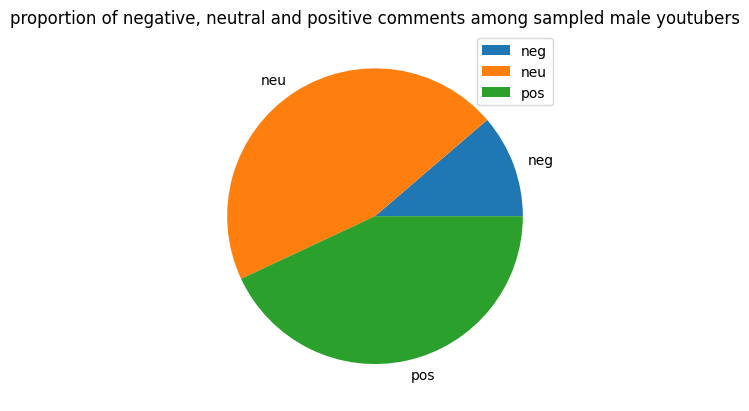

In [28]:
male_emo_ct.plot(y = 'Youtuber', 
                 ylabel = '',
                 kind = 'pie', 
                 title = 'proportion of negative, neutral and positive comments among sampled male youtubers')


<Axes: title={'center': 'proportion of negative, neutral and positive comments among sampled female youtubers'}>

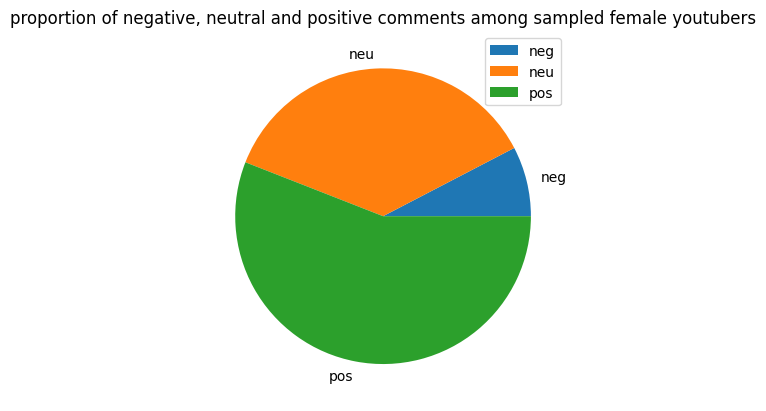

In [30]:
female_emo_ct.plot(y = 'Youtuber', 
                   ylabel = '',
                   kind = 'pie', 
                   title = "proportion of negative, neutral and positive comments among sampled female youtubers")

## Null Hypothesis (H0):
There is no association between gender and sentiment category in the comments on YouTube videos.

## Alternative Hypothesis (Ha):
There is an association between gender and sentiment category in the comments on YouTube videos.

In [31]:
male_emo_ct

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,,
neg,337,337,337,337,337,337,337,337
neu,1364,1361,1364,1364,1364,1364,1364,1364
pos,1285,1285,1285,1285,1285,1285,1285,1285


In [32]:
female_emo_ct

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,youtuber,sex
Emotion,,,,,,,,
neg,286,286,286,286,286,286,286,286
neu,1364,1359,1364,1364,1364,1364,1364,1364
pos,2095,2095,2095,2095,2095,2095,2095,2095


In [33]:
m_val = male_emo_ct.get('Youtuber').values
f_val = female_emo_ct.get('Youtuber').values

In [34]:
m_val

array([ 337, 1364, 1285])

In [35]:
chi_data = {'M': m_val, 'F': f_val}

In [36]:
# create contingency table
cont_table = pd.DataFrame(chi_data).T
cont_table = cont_table.reset_index().rename(columns = {'index':'Gender', 
                                                        0: 'Negative', 
                                                        1: 'Neutral', 
                                                        2: 'Positive'})
cont_table = cont_table.set_index('Gender')
cont_table

,Negative,Neutral,Positive
Gender,,,
M,337,1364,1285
F,286,1364,2095


In [37]:
chi2, p, dof, expected = chi2_contingency(cont_table)

In [38]:
print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-Squared: 114.15262047662172
P-value: 1.6295714832432853e-25
Degrees of Freedom: 2
Expected frequencies:
[[ 276.3746843 1210.1928391 1499.4324766]
 [ 346.6253157 1517.8071609 1880.5675234]]


The small p-value suggests that the association between gender and sentiment categories in the comments is statistically significant.

## NLP EDA

In [39]:
male

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion,youtuber,sex
0,mrbeast gaming,definitely videos pulls someone loosing judge ...,2022-04-26T19:21:41Z,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",pos,mrbeast gaming,M
1,mrbeast gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28T04:38:01Z,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",neu,mrbeast gaming,M
2,mrbeast gaming,person who’s family owns dairy farm works dfa ...,2022-07-15T02:39:50Z,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",pos,mrbeast gaming,M
3,mrbeast gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31T22:34:41Z,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",pos,mrbeast gaming,M
4,mrbeast gaming,going lie chandler karl’s farm really good wou...,2022-04-19T17:38:46Z,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",pos,mrbeast gaming,M
...,...,...,...,...,...,...,...,...,...
2981,georgenotfound,love they39re calm impatient mobs lol,2022-01-15T13:48:43Z,6,37,"{'roberta_neg': 0.02330895, 'roberta_neu': 0.1...",pos,georgenotfound,M
2982,georgenotfound,love george danger relies dream save,2021-07-01T04:37:11Z,6,36,"{'roberta_neg': 0.04949963, 'roberta_neu': 0.4...",pos,georgenotfound,M
2983,georgenotfound,imagine mobs seeing two humanoids run home cha...,2020-12-11T06:54:58Z,13,95,"{'roberta_neg': 0.07725095, 'roberta_neu': 0.8...",neu,georgenotfound,M
2984,georgenotfound,don39t foodbrbrme bintensely stares cake blocksb,2021-02-08T18:54:53Z,6,48,"{'roberta_neg': 0.3660413, 'roberta_neu': 0.58...",neu,georgenotfound,M


In [40]:
male_text = male.get('Comments').values

In [41]:
stopwords = set(STOPWORDS)

In [42]:
comment_words = ''

In [43]:
for val in male_text:
    val = str(val)
    tokens = val.split()
    
        
    comment_words += ' '.join(tokens) + ' '
    
    

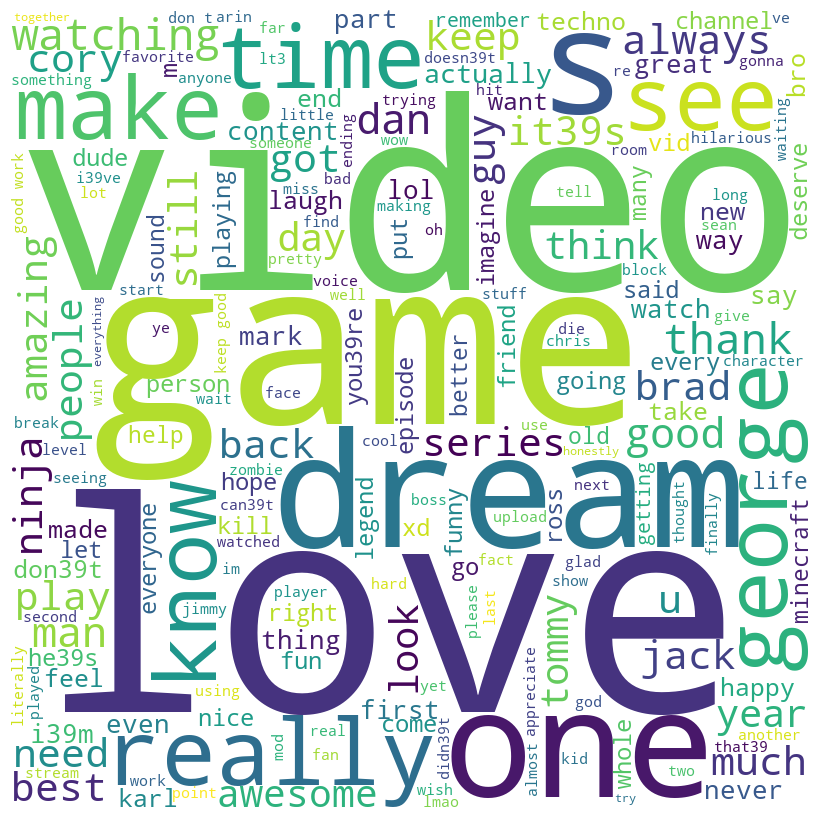

In [44]:
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [45]:
comment_text = " ".join(male_text)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

TypeError: sequence item 2433: expected str instance, float found

In [87]:
## Sentiment over Time

In [91]:
male_pos = male[male.get('Emotion')=='pos']
male_neg = male[male.get('Emotion')=='neg']
male_neu = male[male.get('Emotion')=='neu']


<Axes: xlabel='Date'>

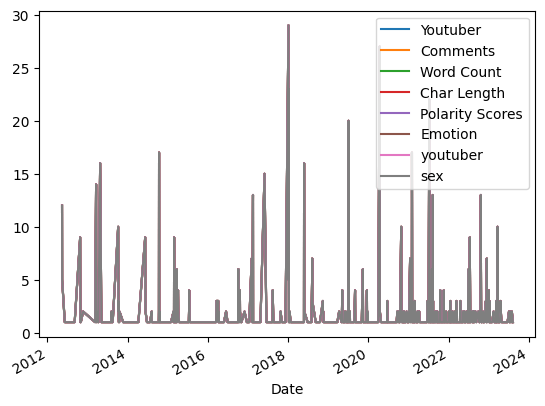

In [103]:
male_pos.groupby('Date').count().plot()

SyntaxError: invalid syntax (1882063930.py, line 1)